In [1]:
from sympy import symbols, init_printing, BlockMatrix, MatrixSymbol, Matrix, block_collapse
from sympy import Identity, ZeroMatrix, Eq, DiagonalMatrix
from sympy import solve, conjugate, Symbol, factor, simplify
from sympy.physics.quantum import Dagger
init_printing()

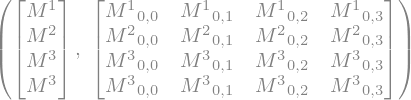

In [2]:
m1 = MatrixSymbol(r'{{M^{1}}}', 1, 4)
m2 = MatrixSymbol(r'{{M^{2}}}', 1, 4)
m3 = MatrixSymbol(r'{{M^{3}}}', 1, 4)
m4 = MatrixSymbol(r'{{M^{3}}}', 1, 4)
M = BlockMatrix([
    [m1],
    [m2],
    [m3],
    [m4]
])
M, M.as_explicit()

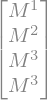

In [3]:
display(M)

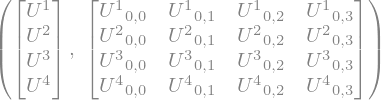

In [4]:
u1 = MatrixSymbol(r'{{U^{1}}}', 1, 4)
u2 = MatrixSymbol(r'{{U^{2}}}', 1, 4)
u3 = MatrixSymbol(r'{{U^{3}}}', 1, 4)
u4 = MatrixSymbol(r'{{U^{4}}}', 1, 4)
U = BlockMatrix([
    [u1],
    [u2],
    [u3],
    [u4]
])
U, U.as_explicit()

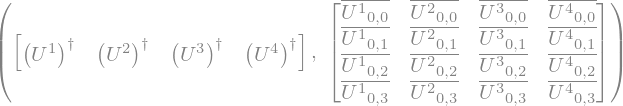

In [5]:
UDagger = BlockMatrix([
    [Dagger(u1), Dagger(u2), Dagger(u3), Dagger(u4)],
])
UDagger, UDagger.as_explicit()

In [6]:
UDU = block_collapse(UDagger*U)

In [7]:
UDU

From the last result we can write one product in term of the other ones. We obtain the unitary condition

In [8]:
UDU - Dagger(u4)*u4

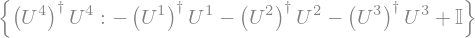

In [9]:
unitary_condition = {Dagger(u4)*u4: Identity(4) - (UDU - Dagger(u4)*u4)}
unitary_condition

In [10]:
block_collapse(UDU.subs(unitary_condition))

In [11]:
u14, u24, u34, u44 = symbols('u_{14}, u_{24}, u_{34}, u_{44}')
ui4_changes = {
    u1[0,3]:u14, u2[0,3]:u24, u3[0,3]:u34,
    u4[0,0]:u14, u4[0,1]:u24, u4[0,2]:u34, u4[0,3]:u44
}

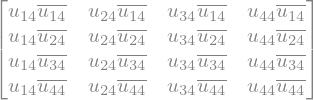

In [12]:
u4Du4_explicit = (Dagger(u4)*u4).as_explicit().subs(ui4_changes)
u4Du4_explicit

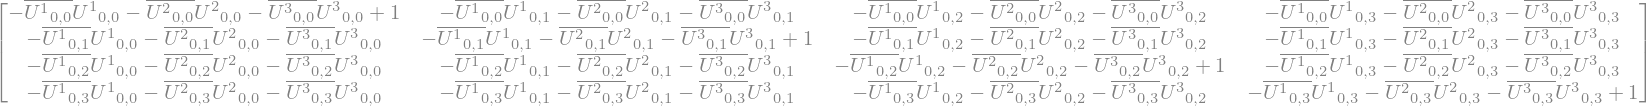

In [13]:
(unitary_condition[Dagger(u4)*u4]).as_explicit()

In [14]:
from neutrinos import UpmnsStandardParametrization, NuOscObservables
th12, th13, th23 = symbols(r'\theta_{12},\theta_{13},\theta_{23}', real=True)
Upmns = UpmnsStandardParametrization(th12, th13, th23)

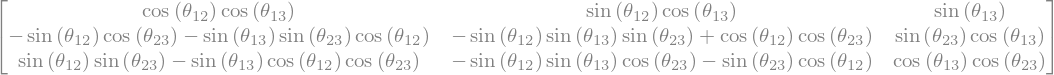

In [15]:
Upmns

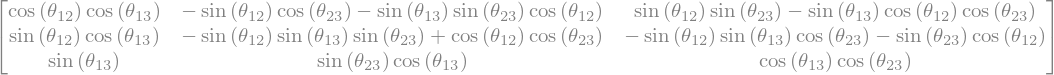

In [16]:
Dagger(Upmns)

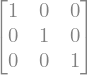

In [17]:
simplify(Upmns.T*Upmns)

In [18]:
Upmns1_changes = {u1[0,i]:Upmns[0,i] for i in range(3)}
Upmns2_changes = {u2[0,i]:Upmns[1,i] for i in range(3)}
Upmns3_changes = {u3[0,i]:Upmns[2,i] for i in range(3)}

In [19]:
Upmns1_changes

In [20]:
unitary_condition_matrix = (unitary_condition[Dagger(u4)*u4]).as_explicit().subs(
    Upmns1_changes
).subs(
    Upmns2_changes
).subs(
    Upmns3_changes
).simplify()

In [21]:
unitary_condition_explicit = {u4Du4_explicit[i,j]:unitary_condition_matrix[i,j] for i in range(4) for j in range(4)}

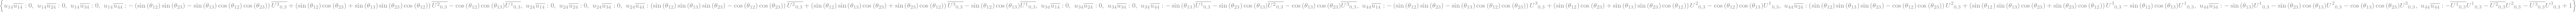

In [22]:
unitary_condition_explicit

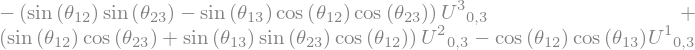

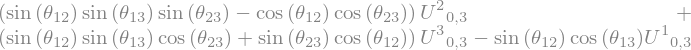

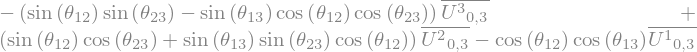

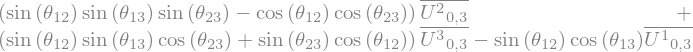

In [23]:
u4u4_components_not_zero = []
u4u4_components_zero = []
for uu, val in unitary_condition_explicit.items():
    if val!=0:
        u4u4_components_not_zero.append(uu)
        display(uu, val)
    else:
        u4u4_components_zero.append(uu)

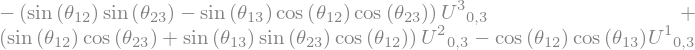

In [24]:
unitary_condition_explicit[u4u4_components_not_zero[0]]

In [25]:
unitary_condition_components_zeros = {uu:0 for uu in u4u4_components_zero}
unitary_condition_components_zeros

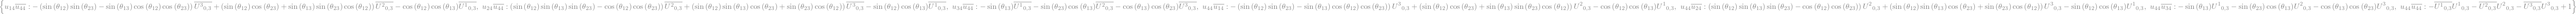

In [26]:
unitary_condition_components_not_zeros = {uu:unitary_condition_explicit[uu] for uu in u4u4_components_not_zero}
unitary_condition_components_not_zeros

## Diagonalization

In [27]:
mlight = block_collapse(UDagger*M*U)

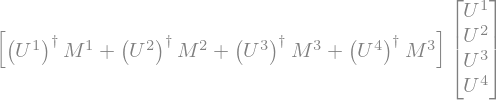

In [28]:
mlight

In [29]:
mnu1 = MatrixSymbol('{{m_1}}', 1, 1)
mnu2 = MatrixSymbol('{{m_2}}', 1, 1)
mnu3 = MatrixSymbol('{{m_3}}', 1, 1)
mnu4 = MatrixSymbol('{{m_4}}', 1, 1)

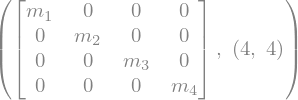

In [30]:
Mdiag = BlockMatrix([
    [mnu1, ZeroMatrix(1, 1), ZeroMatrix(1, 1), ZeroMatrix(1, 1)],
    [ZeroMatrix(1, 1), mnu2, ZeroMatrix(1, 1), ZeroMatrix(1, 1)],
    [ZeroMatrix(1, 1), ZeroMatrix(1, 1), mnu3, ZeroMatrix(1, 1)],
    [ZeroMatrix(1, 1), ZeroMatrix(1, 1), ZeroMatrix(1, 1), mnu4]
])


Mdiag, Mdiag.shape

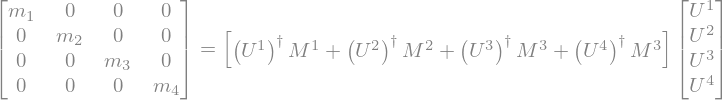

In [31]:
Eq(Mdiag, mlight)

In [32]:
mlight.args[0].blocks[0,0].shape

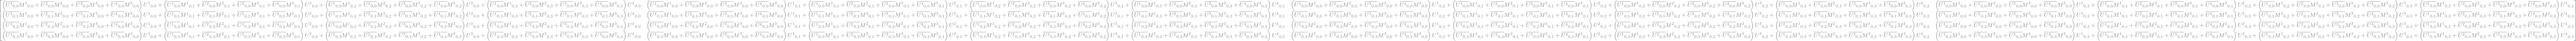

In [33]:
mlight_explicit = mlight.as_explicit()
mlight_explicit

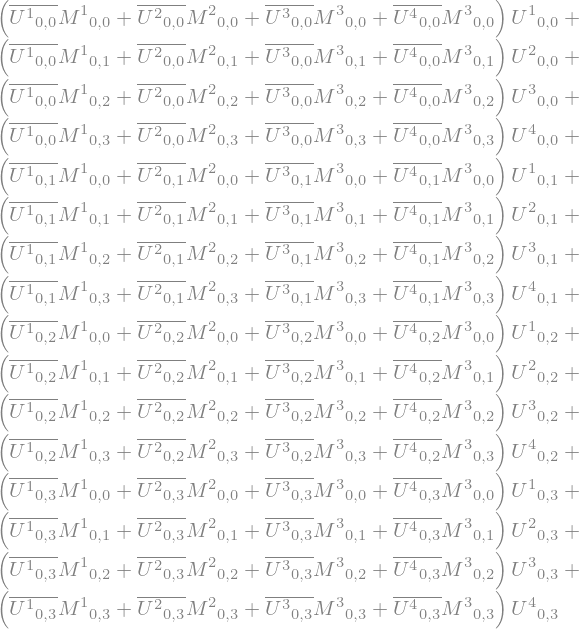

In [34]:
mlight_explicit.trace()

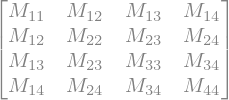

In [35]:
M11, M12, M13, M14 = symbols('M_{11}, M_{12}, M_{13}, M_{14}')
M21, M22, M23, M24 = symbols('M_{21}, M_{22}, M_{23}, M_{24}')
M31, M32, M33, M34 = symbols('M_{31}, M_{32}, M_{33}, M_{34}')
M41, M42, M43, M44 = symbols('M_{41}, M_{42}, M_{43}, M_{44}') 
Mexp = Matrix(
    [
        [M11, M12, M13, M14],
        [M12, M22, M23, M24],
        [M13, M23, M33, M34],
        [M14, M24, M34, M44]
    ]
)
Mexp

In [36]:
unitary_condition_components_zeros

In [37]:
mlight_f = mlight.subs(m1, Mexp.row(0)).subs(m2, Mexp.row(1)).subs(m3, Mexp.row(2)).subs(m4, Mexp.row(3)).as_explicit(
    
).subs(
    ui4_changes
).expand().subs(
    unitary_condition_components_zeros
).subs(
    unitary_condition_components_not_zeros
).subs(
    Upmns1_changes
).subs(
    Upmns2_changes
).subs(
    Upmns3_changes
).factor()

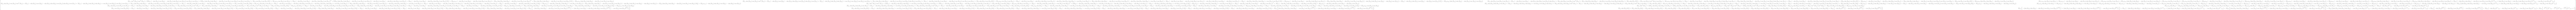

In [38]:
mlight_f

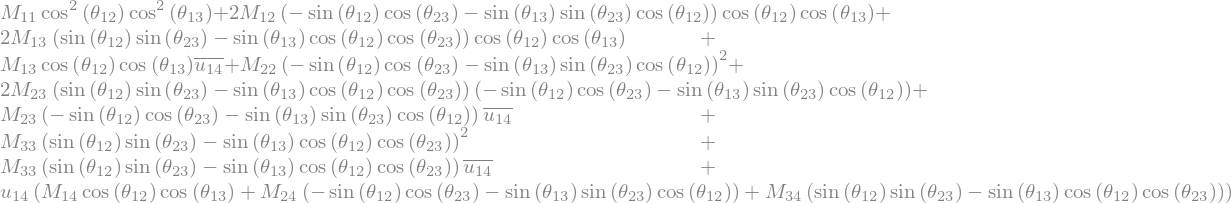

In [39]:
mlight_f[0,0].collect([u14, u24, u34, u44])

In [40]:
# from sympy.matrices.expressions import CompanionMatrix

In [41]:
#mlight_charpoly = mlight_f.charpoly()

In [42]:
#CompanionMatrix(mlight_charpoly)

## Inverse transformation

In [43]:
UMdiagUD = block_collapse(U*Mdiag*UDagger)

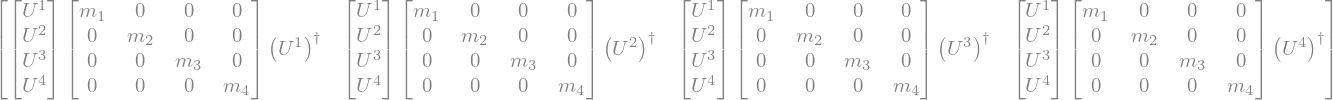

In [44]:
UMdiagUD

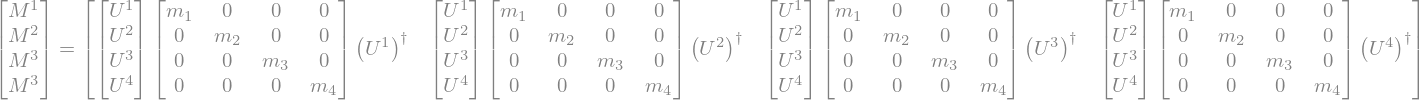

In [45]:
Eq(M, UMdiagUD)

In [46]:
UMdiagUD_explicit = UMdiagUD.as_explicit()

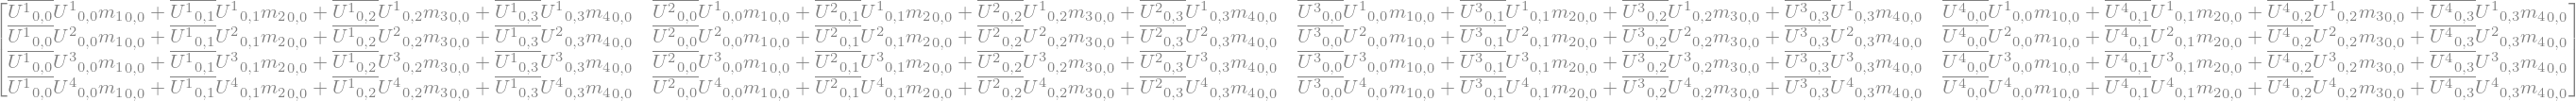

In [47]:
UMdiagUD_explicit

In [48]:
mnu1[0, 0]

In [49]:
mn1, mn2, mn3, mn4 = symbols(r'm_{\nu_1}, m_{\nu_2}, m_{\nu_3}, m_{\nu_4}', positive=True)
mn_subs = {
    mnu1[0, 0]:mn1,
    mnu2[0, 0]:mn2,
    mnu3[0, 0]:mn3,
    mnu4[0, 0]:mn4
}

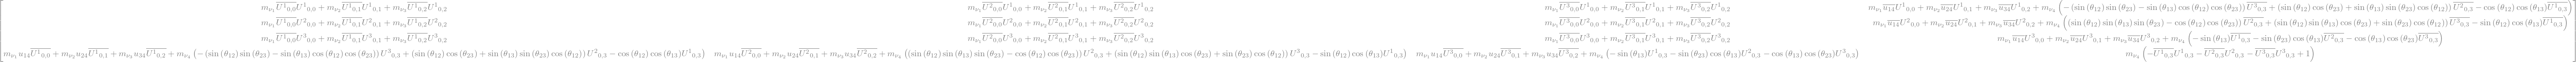

In [50]:
UMdiagUD_explicit.subs(mn_subs).subs(ui4_changes).subs(unitary_condition_components_zeros).subs(
    unitary_condition_components_not_zeros
)

In [51]:
UMdiagUD_conditions = UMdiagUD_explicit.subs(mn_subs).subs(ui4_changes).subs(unitary_condition_components_zeros).subs(
    unitary_condition_components_not_zeros
).subs(
    Upmns1_changes
).subs(
    Upmns2_changes
).subs(
    Upmns3_changes
).subs(ui4_changes)

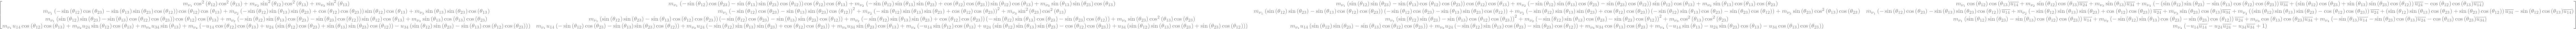

In [52]:
UMdiagUD_conditions

Por la propiedad de simetría de la matriz $M$

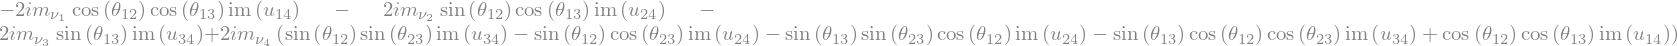

In [53]:
(UMdiagUD_conditions[0, 3] - UMdiagUD_conditions[3, 0]).expand(complex=True).collect([mn1, mn2, mn3, mn4],factor)#.simplify()

In [54]:
MM = M.as_explicit()
eq12 = Eq((UMdiagUD_conditions[0, 1] - UMdiagUD_conditions[1, 0]).simplify(), 0)
eq13 = Eq((UMdiagUD_conditions[0, 2] - UMdiagUD_conditions[2, 0]).simplify(), 0)
eq14 = Eq((UMdiagUD_conditions[0, 3] - UMdiagUD_conditions[3, 0]).expand(complex=True).collect(
    [mn1, mn2, mn3, mn4],factor), 0)
eq23 = Eq((UMdiagUD_conditions[1, 2] - UMdiagUD_conditions[2, 1]).simplify(), 0)
eq24 = Eq((UMdiagUD_conditions[1, 3] - UMdiagUD_conditions[3, 1]).expand(complex=True).collect(
    [mn1, mn2, mn3, mn4],factor), 0)
eq34 = Eq((UMdiagUD_conditions[2, 3] - UMdiagUD_conditions[3, 2]).expand(complex=True).collect(
    [mn1, mn2, mn3, mn4],factor), 0)

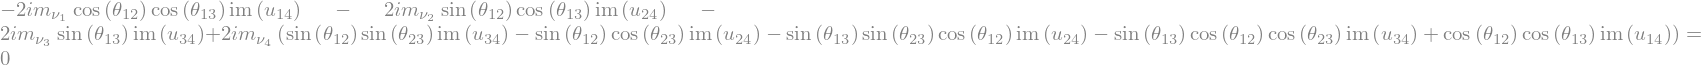

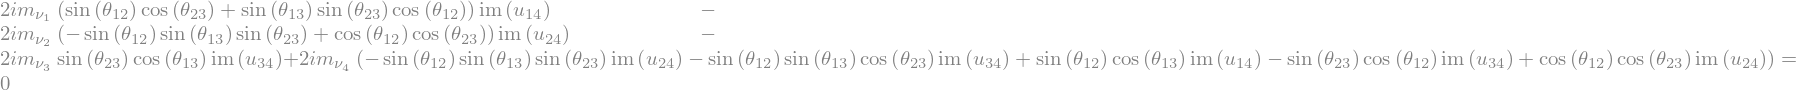

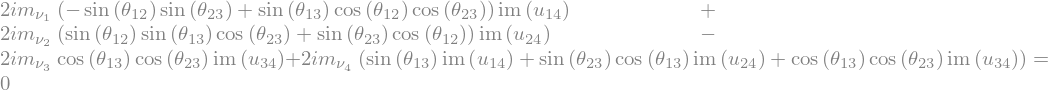

In [55]:
display(eq12)
display(eq13)
display(eq14)
display(eq23)
display(eq24)
display(eq34)

In [56]:
from sympy import re, im

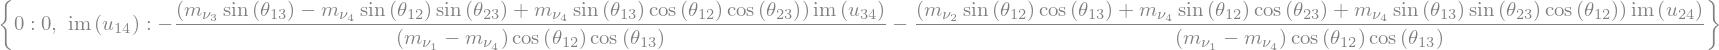

In [57]:
u14_im_sol = solve(eq14, im(u14), dict=True)[0]
u14_im_sol[im(u14)] = u14_im_sol[im(u14)].collect([im(u24), im(34)], factor)
u14_im_sol


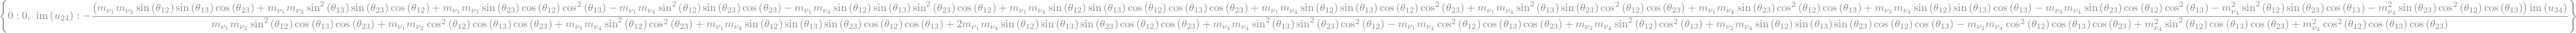

In [58]:
u24_im_sol = solve(eq24.subs(u14_im_sol), im(u24), dict=True)[0]
u24_im_sol[im(u24)] = u24_im_sol[im(u24)].collect([im(34)], factor)
u24_im_sol

In [59]:
u24_im_sol[im(u24)].atoms(Symbol)

In [60]:
eq34.lhs.subs(u14_im_sol).subs(u24_im_sol).atoms(Symbol)

In [61]:
eq34 = Eq(eq34.lhs.subs(u14_im_sol).subs(u24_im_sol).expand().collect(im(u34)), 0)

In [62]:
print(eq34.lhs)

(-2*I*m_{\nu_1}**2*m_{\nu_2}*m_{\nu_3}*sin(\theta_{12})**3*sin(\theta_{13})*sin(\theta_{23})*cos(\theta_{13})*cos(\theta_{23})/(m_{\nu_1}**2*m_{\nu_2}*sin(\theta_{12})**2*cos(\theta_{12})*cos(\theta_{13})**2*cos(\theta_{23}) + m_{\nu_1}**2*m_{\nu_2}*cos(\theta_{12})**3*cos(\theta_{13})**2*cos(\theta_{23}) + m_{\nu_1}**2*m_{\nu_4}*sin(\theta_{12})**2*cos(\theta_{12})*cos(\theta_{13})*cos(\theta_{23})**2 + m_{\nu_1}**2*m_{\nu_4}*sin(\theta_{12})*sin(\theta_{13})*sin(\theta_{23})*cos(\theta_{12})**2*cos(\theta_{13})**2 + 2*m_{\nu_1}**2*m_{\nu_4}*sin(\theta_{12})*sin(\theta_{13})*sin(\theta_{23})*cos(\theta_{12})**2*cos(\theta_{13})*cos(\theta_{23}) + m_{\nu_1}**2*m_{\nu_4}*sin(\theta_{13})**2*sin(\theta_{23})**2*cos(\theta_{12})**3*cos(\theta_{13}) - m_{\nu_1}**2*m_{\nu_4}*cos(\theta_{12})**3*cos(\theta_{13})**2*cos(\theta_{23}) + m_{\nu_1}*m_{\nu_2}*m_{\nu_4}*sin(\theta_{12})**2*cos(\theta_{12})*cos(\theta_{13})**3 - m_{\nu_1}*m_{\nu_2}*m_{\nu_4}*sin(\theta_{12})**2*cos(\theta_{12})*cos(

In [63]:
u34_im_sol = solve(eq34, im(u34), dict=True)[0]
#u34_im_sol[im(u24)] = u24_im_sol[im(u24)].collect([im(34)], factor)
print(u34_im_sol[im(u34)])

0


In [64]:
print(u34_im_sol)

{0: 0, im(u_{34}): 0}


In [65]:
u24_im_sol[im(u24)].subs(u34_im_sol)

In [66]:
u14_im_sol[im(u14)].subs(u34,0).subs(u24,0)

**The solution in this case gives the imaginary parts of $u_{14}$, $u_{24}$ and $u_{34}$ are zero, then these are real numbers**

i=1


i=2


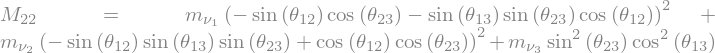

i=3


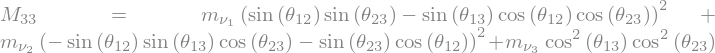

i=4


In [67]:
eqs_diag = {}
for i in range(4):
    print(f'i={i+1}')
    eqs_diag[i+1] = Eq(Mexp[i, i] ,UMdiagUD_conditions[i, i])
    display(eqs_diag[i+1])

In [68]:
eq44 = Eq(Mexp[3,3], eqs_diag[4].rhs.expand(complex=True).simplify().subs(im(u14),0).subs(im(u24),0).subs(im(u34),0))

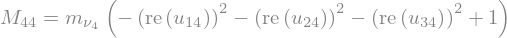

In [69]:
eq44

### Invariants

#### Trace

In [70]:
u14r, u24r, u34r = symbols('{{u_{14}^r}}, {{u_{24}^r}}, {{u_{34}^r}}', real=True)
u4real = {
        u14:u14r,
        u24:u24r,
        u34:u34r
    }
UMdiagUD_conditions = UMdiagUD_conditions.subs(
    u4real 
)

In [71]:
UMdiagUD_trace = UMdiagUD_conditions.trace()

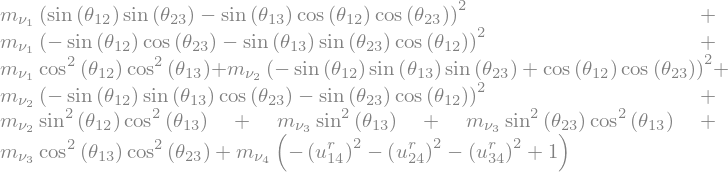

In [281]:
UMdiagUD_trace

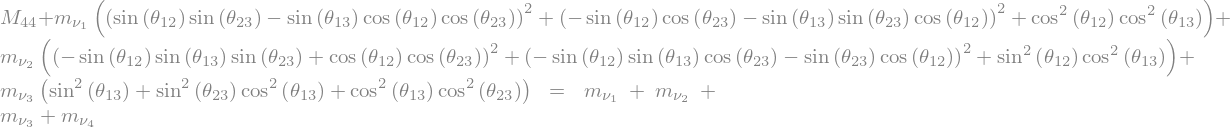

In [72]:
eqtr = Eq(UMdiagUD_trace.subs(eq44.rhs.subs(
    u4real
), M44).collect([mn1, mn2, mn3, mn4]), mn1 + mn2 + mn3 + mn4)
eqtr

In [73]:
M44_sol = solve(eqtr, M44, dict=True)[0]

In [74]:
M44_sol[M44]

So, the equation 44 is written as

In [75]:
eq44 = Eq(mn4, 
        eqs_diag[4].rhs.expand(complex=True).simplify().subs(im(u14),0).subs(im(u24),0).subs(im(u34),0).subs(
    {
        u14:u14r,
        u24:u24r,
        u34:u34r
    }
).factor())

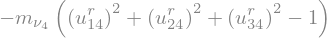

In [76]:
eq44.rhs#args[1].args

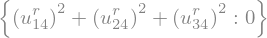

In [77]:
solve(eq44, u14r**2 + u24r**2 + u34r**2, dict=True)[0]

**then real value of $u_{34}$ dependes on $u_{14}$ and $u_{24}$**

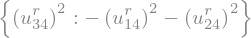

In [78]:
u34r_sol = {u34r**2: - (u14r**2 + u24r**2)}
u34r_sol

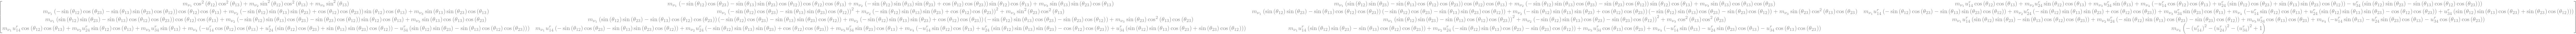

In [283]:
UMdiagUD_conditions#.subs(u34r_sol)

To summarize we have found the following form of the mixing matrix $4\times4$

In [79]:
from sympy import sqrt

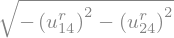

In [80]:
sqrt(u34r_sol[u34r**2].factor())

In [81]:
U1 = U.as_explicit().subs(
    Upmns1_changes
).subs(
    Upmns2_changes
).subs(
    Upmns3_changes
).subs(
    ui4_changes
).subs(
    u4real
)
#.subs(
#    u34r,sqrt(u34r_sol[u34r**2])
#)

In [82]:
U1Dagger = Dagger(U1)

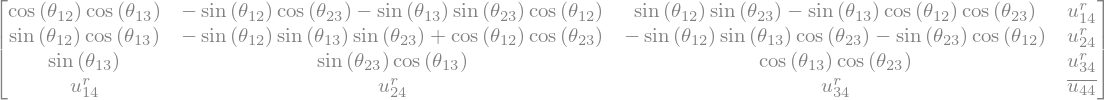

In [83]:
U1Dagger

#### Determinant

the fast methods to calculate de determinant a `.det(method="berkowitz")` and `.det(method="lu")`

In [388]:
U1MdiagU1D = (
    U1*Mdiag.as_explicit().subs({mnu1[0,0]:mn1, mnu2[0,0]:mn2, mnu3[0,0]:mn3, mnu4[0,0]:mn4})*U1Dagger
).as_explicit()

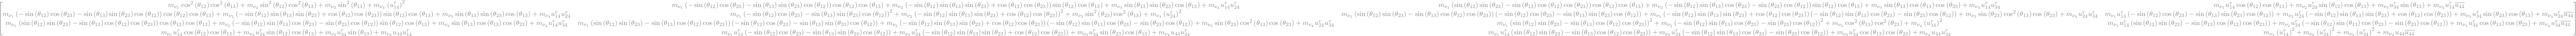

In [389]:
U1MdiagU1D

In [390]:
U1MdiagU1D = U1MdiagU1D#.subs(u34r,0).subs(u24r, -u14r) # caso u34r = 0

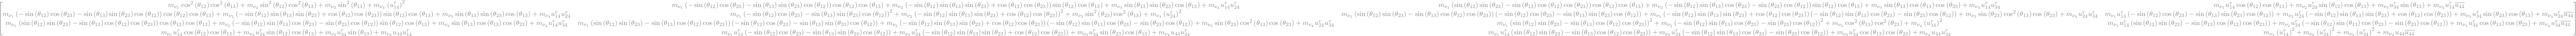

In [391]:
U1MdiagU1D

In [392]:
UMdiagUD_det = U1MdiagU1D.det(method="berkowitz")

In [393]:
#from sympy import symbols, expand, factor
from sympy import expand, eye, trigsimp
from functools import lru_cache

#x, y, z = symbols('x y z')

@lru_cache(maxsize=None)
def expand_expr(expr):
    return expand(expr)

@lru_cache(maxsize=None)
def charpoly_matrix(matrix):
    return matrix.charpoly()
#expr = (x + y + z)**10
#expanded_expr = expand_expr(expr)
#factored_expr = factor(expanded_expr)
#print(factored_expr)

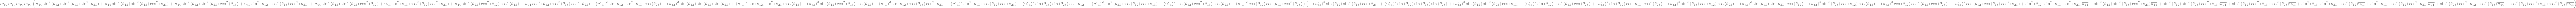

In [299]:
expand_expr(UMdiagUD_det).factor()

In [394]:
x = symbols('x')
A = Matrix(4, 4, symbols('A:4:4'))
A_det = A.det()

In [395]:
U1MdiagU1D_charpoly = A_det.subs(zip(list(A), list(U1MdiagU1D - x*eye(4)))).expand().collect(x, factor)
#U1MdiagU1D_charpoly = A_det.subs(zip(list(A), list(UMdiagUD_conditions - x*eye(4)))).expand().collect(x, factor)

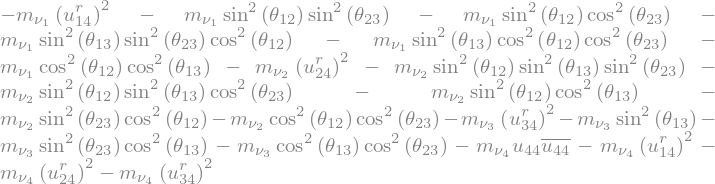

In [396]:
U1MdiagU1D_charpoly.coeff(x,3)

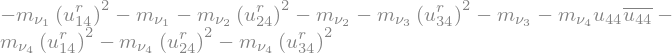

In [397]:
trigsimp(U1MdiagU1D_charpoly.coeff(x,3))

In [399]:
U1MdiagU1D_charpoly_x3 = trigsimp(U1MdiagU1D_charpoly.coeff(x,3))
print('x3 finished')

x3 finished


In [400]:
U1MdiagU1D_charpoly_x2 = trigsimp(U1MdiagU1D_charpoly.coeff(x,2))
print('x2 finished')

x2 finished


In [435]:
U1MdiagU1D_charpoly_x2 = U1MdiagU1D_charpoly_x2.collect([mn1*mn2, mn1*mn3, mn1*mn4, mn2*mn3, mn2*mn4, mn3*mn4], lambda x: x.subs(u34r_sol).expand().collect([u14r, u24r], factor))

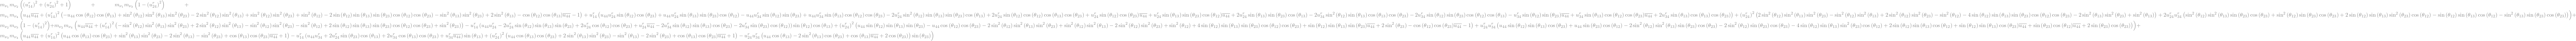

In [436]:
U1MdiagU1D_charpoly_x2

In [416]:
U1MdiagU1D_charpoly_x1 = U1MdiagU1D_charpoly.coeff(x,1).collect([mn1*mn2*mn3, mn1*mn2*mn4, mn1*mn3*mn4, mn2*mn3*mn4], lambda x:trigsimp(x).subs(u34r_sol).expand().collect([u14r, u24r], factor))
print('x1 finished')

x1 finished


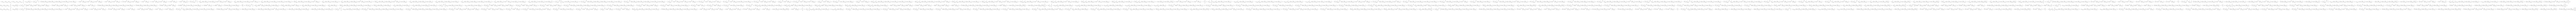

In [417]:
U1MdiagU1D_charpoly_x1 

In [418]:
from sympy import cse

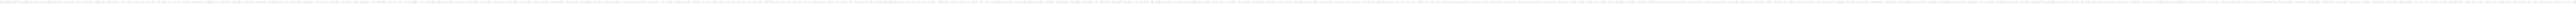

In [419]:
cse(U1MdiagU1D_charpoly_x1, ignore=(mn1*mn2*mn3, mn1*mn2*mn4, mn1*mn3*mn4, mn2*mn3*mn4, u14r, u24r))[1]

In [420]:
U1MdiagU1D_charpoly_x0 = trigsimp(U1MdiagU1D_charpoly.coeff(x,0))
print('x0 finished')

x0 finished


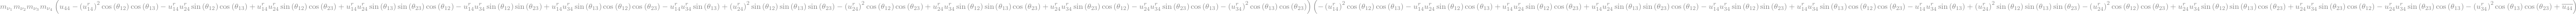

In [421]:
U1MdiagU1D_charpoly_x0

Diagonal matrix invariants

In [437]:
Mdiag_charpoly = A_det.subs(zip(list(A), list(Mdiag.as_explicit().subs(mn_subs) - x*eye(4)))).expand(
    
).collect(x, factor)

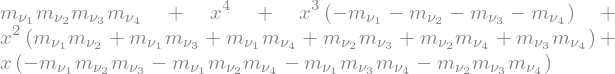

In [438]:
Mdiag_charpoly

In [439]:
Mdiag_charpoly_x0 = Mdiag_charpoly.expand().coeff(x,0)
Mdiag_charpoly_x1 = Mdiag_charpoly.expand().coeff(x,1)
Mdiag_charpoly_x2 = Mdiag_charpoly.expand().coeff(x,2)
Mdiag_charpoly_x3 = Mdiag_charpoly.expand().coeff(x,3)

In [440]:
eqx0 = Eq(Mdiag_charpoly_x0, U1MdiagU1D_charpoly_x0)
eqx1 = Eq(Mdiag_charpoly_x1, U1MdiagU1D_charpoly_x1)
eqx2 = Eq(Mdiag_charpoly_x2, U1MdiagU1D_charpoly_x2)
eqx3 = Eq(Mdiag_charpoly_x3, U1MdiagU1D_charpoly_x3)

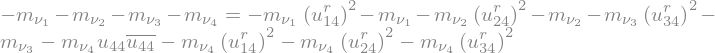

In [426]:
eqx3

In [429]:
u44cu44_sol = solve(eqx3, u44*conjugate(u44), dict=True)[0]
u44cu44_sol[u44*conjugate(u44)] = u44cu44_sol[u44*conjugate(u44)].subs(u34r_sol).expand().collect([u14r, u24r])

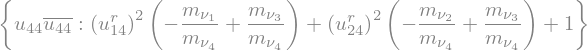

In [430]:
u44cu44_sol

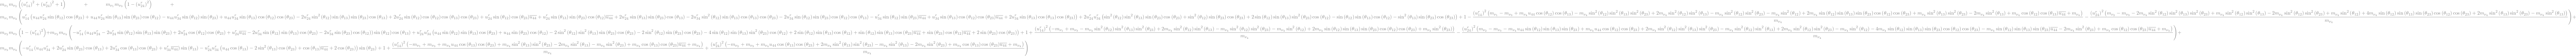

In [444]:
eqx2.rhs.subs(u44cu44_sol).collect([mn1*mn2, mn1*mn3, mn1*mn4, mn2*mn3, mn2*mn4, mn3*mn4], lambda x: x.expand().collect([u14r, u24r], factor))

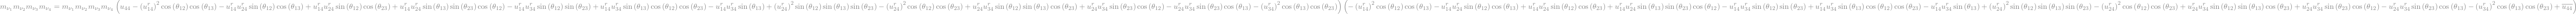

In [445]:
eqx0

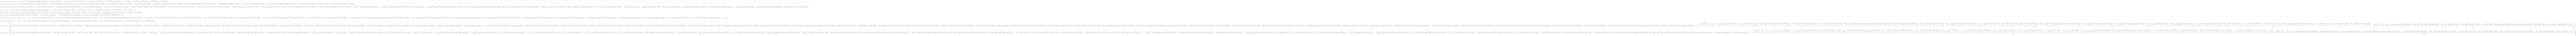

In [449]:
eqx1.rhs.subs(u44cu44_sol).collect([mn1*mn2*mn3, mn1*mn2*mn2, mn1*mn3*mn4, mn2*mn3*mn4], lambda x: x.expand().collect([u14r, u24r], factor))

In [311]:
UMdiagUD_charpoly_cse = cse(UMdiagUD_charpoly)

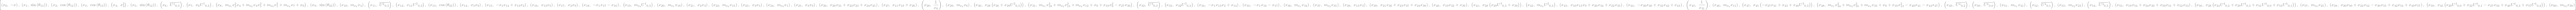

In [312]:
UMdiagUD_charpoly_cse[0]

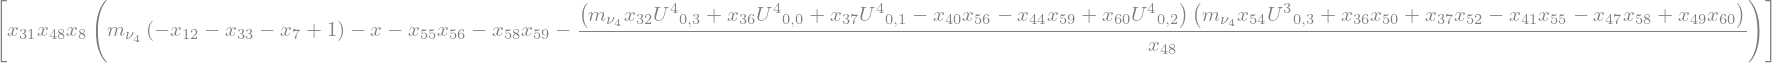

In [313]:
UMdiagUD_charpoly_cse[1]